# Limpando os dados

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#df = pd.read_excel('Dados_Torres_Anemométricas 2020.xlsx', index_col=0)  
from pandas import read_excel
file_name = r'Dados_Torres_Anemométricas.xlsx' # change it to the name of your excel file
df = read_excel(file_name)

In [113]:
df =df.drop(df.index[[0]])
df=df.rename(columns={'Parque Eólico Renascença I' : 'Date', 'Unnamed: 1': 'V95',
                   'Unnamed: 2':'Dir95', 'Unnamed: 3':'V75', 'Unnamed: 4' : 'Dir75'})

In [114]:
# Replace using median 
median = df['V95'].median()
df['V95'].fillna(median, inplace=True)

In [115]:
df = df[(df['V95'] >= 0) | (df['V95'].isnull())]
df = df[(df['V75'] >= 0) | (df['V75'].isnull())]
df = df[(df['Dir95'] >= 0) | (df['Dir95'].isnull())]
df = df[(df['Dir75'] >= 0) | (df['Dir75'].isnull())]

In [116]:
df['Date'] = pd.to_datetime(df['Date'])

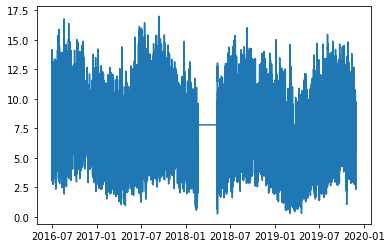

In [117]:
plt.plot(df['Date'], df['V95'])
plt.show()

In [118]:
df.isnull().sum()

Date         0
V95          0
Dir95    12394
V75       2251
Dir75     2257
dtype: int64

In [119]:
data = df[['Date', 'V95']]
data.columns = ['ds', 'y'] 
data.head()

,ds,y
1,2016-07-01 00:00:00,7.28
2,2016-07-01 00:10:00,7.85
3,2016-07-01 00:20:00,8.61
4,2016-07-01 00:30:00,5.59
5,2016-07-01 00:40:00,6.25


# 2. Model

In [120]:
from neuralprophet import NeuralProphet

In [121]:
from neuralprophet import NeuralProphet

model = NeuralProphet(growth="discontinuous")
metrics = model.fit(data, freq = 'M', epochs = 2000)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128


  0%|          | 0/362 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.98E-02, min: 4.23E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.52E-01
Epoch[2000/2000]: 100%|█████| 2000/2000 [17:11:38<00:00, 30.95s/it, SmoothL1Loss=0.0132, MAE=1.42, MSE=3.22, RegLoss=0]


# 3. Make predictions

In [122]:
future = model.make_future_dataframe(data, periods = 20, n_historic_predictions=len(data))
forecast = model.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2016-07-01 00:00:00,7.28,7.467497,0.187497,8.347511,-0.085251,-0.013460,-0.781302
1,2016-07-01 00:10:00,7.85,7.423522,-0.426478,8.347415,-0.085113,-0.013484,-0.825297
2,2016-07-01 00:20:00,8.61,7.377677,-1.232323,8.347319,-0.084975,-0.013508,-0.871160
3,2016-07-01 00:30:00,5.59,7.329844,1.739844,8.347223,-0.084836,-0.013532,-0.919011
4,2016-07-01 00:40:00,6.25,7.280207,1.030207,8.347127,-0.084698,-0.013557,-0.968665


In [123]:
future.head()

,ds,y,t,y_scaled
0,2016-07-01 00:00:00,7.28,0.000000,0.636199
1,2016-07-01 00:10:00,7.85,0.000006,0.687783
2,2016-07-01 00:20:00,8.61,0.000011,0.756561
3,2016-07-01 00:30:00,5.59,0.000017,0.483258
4,2016-07-01 00:40:00,6.25,0.000022,0.542986


In [128]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2016-07-01 00:00:00.000,7.28,7.467497,0.187497,8.347511,-0.085251,-0.013460,-0.781302
1,2016-07-01 00:10:00.000,7.85,7.423522,-0.426478,8.347415,-0.085113,-0.013484,-0.825297
2,2016-07-01 00:20:00.000,8.61,7.377677,-1.232323,8.347319,-0.084975,-0.013508,-0.871160
3,2016-07-01 00:30:00.000,5.59,7.329844,1.739844,8.347223,-0.084836,-0.013532,-0.919011
4,2016-07-01 00:40:00.000,6.25,7.280207,1.030207,8.347127,-0.084698,-0.013557,-0.968665
...,...,...,...,...,...,...,...,...
179725,2021-03-31 23:49:59.995,NaN,7.823659,NaN,9.863101,-1.292054,-0.008627,-0.738761
179726,2021-04-30 23:49:59.995,NaN,8.664021,NaN,10.003683,-0.571987,-0.028913,-0.738761
179727,2021-05-31 23:49:59.995,NaN,9.029346,NaN,10.148950,-0.483816,0.102974,-0.738761
179728,2021-06-30 23:49:59.995,NaN,9.451755,NaN,10.289531,-0.090388,-0.008627,-0.738761


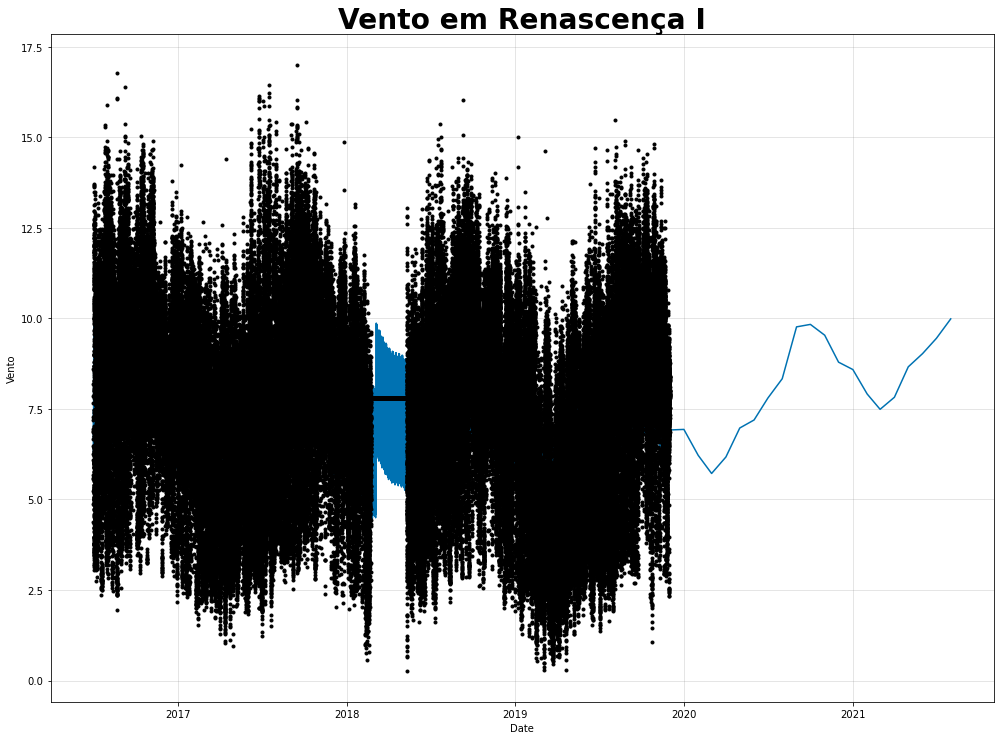

In [124]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast,xlabel="Date", ylabel="Vento", ax=ax)
ax.set_title("Vento em Renascença I", fontsize=28, fontweight="bold")
plt.show()

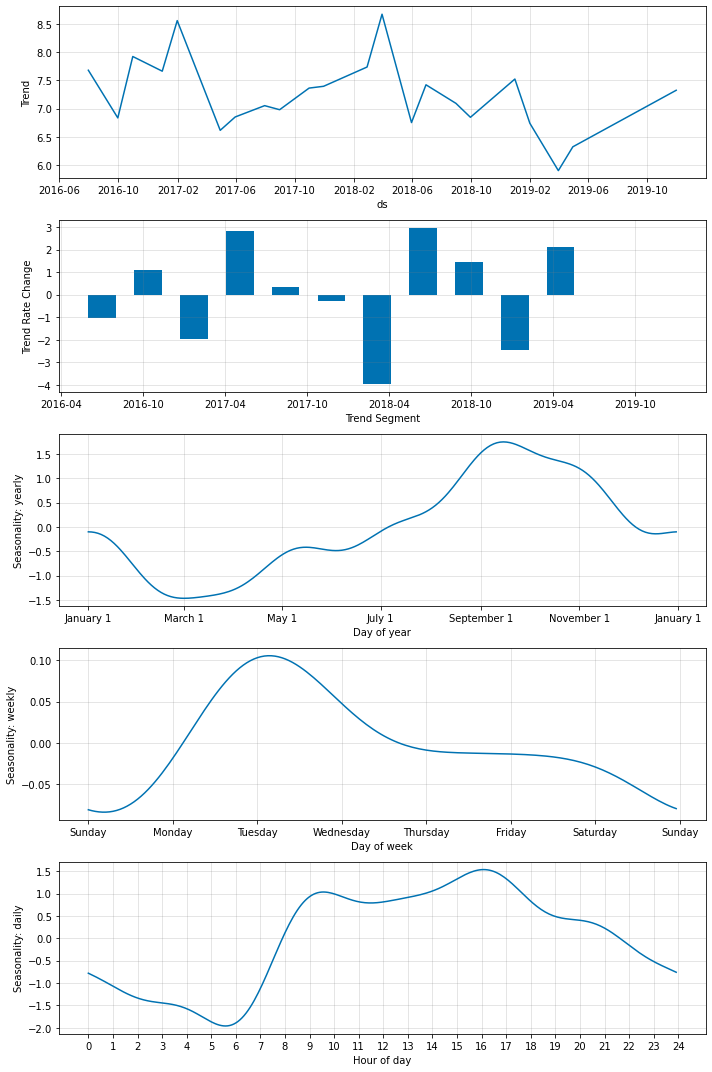

In [125]:
fig_param = model.plot_parameters()
fig_param.savefig("parameters.png")

In [126]:
metrics

,SmoothL1Loss,MAE,MSE,RegLoss
0,0.145494,3.822686,45.704956,0.0
1,0.013680,1.447180,3.340776,0.0
2,0.013662,1.445468,3.336364,0.0
3,0.013610,1.443299,3.323708,0.0
4,0.013589,1.442084,3.318576,0.0
...,...,...,...,...
1995,0.013189,1.421171,3.220881,0.0
1996,0.013189,1.421196,3.220794,0.0
1997,0.013189,1.421141,3.220733,0.0
1998,0.013188,1.421156,3.220691,0.0


In [133]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2016-07-01 00:00:00.000,7.28,7.467497,0.187497,8.347511,-0.085251,-0.013460,-0.781302
1,2016-07-01 00:10:00.000,7.85,7.423522,-0.426478,8.347415,-0.085113,-0.013484,-0.825297
2,2016-07-01 00:20:00.000,8.61,7.377677,-1.232323,8.347319,-0.084975,-0.013508,-0.871160
3,2016-07-01 00:30:00.000,5.59,7.329844,1.739844,8.347223,-0.084836,-0.013532,-0.919011
4,2016-07-01 00:40:00.000,6.25,7.280207,1.030207,8.347127,-0.084698,-0.013557,-0.968665
...,...,...,...,...,...,...,...,...
179725,2021-03-31 23:49:59.995,NaN,7.823659,NaN,9.863101,-1.292054,-0.008627,-0.738761
179726,2021-04-30 23:49:59.995,NaN,8.664021,NaN,10.003683,-0.571987,-0.028913,-0.738761
179727,2021-05-31 23:49:59.995,NaN,9.029346,NaN,10.148950,-0.483816,0.102974,-0.738761
179728,2021-06-30 23:49:59.995,NaN,9.451755,NaN,10.289531,-0.090388,-0.008627,-0.738761


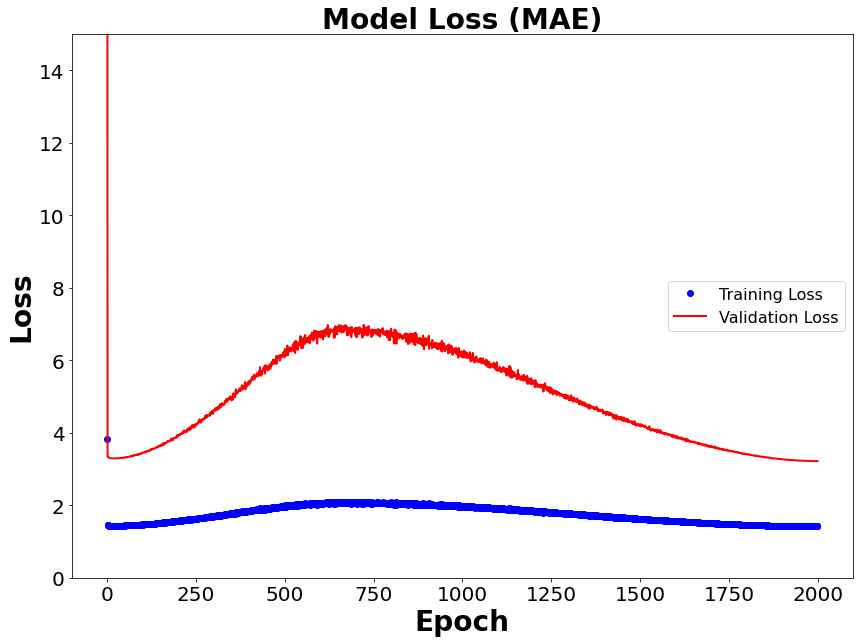

In [132]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["MSE"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")
ax.set_ylim([0,15])

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")
fig.savefig("model_loss_mae.png")

# 4. Model 2

In [15]:
data

,ds,y
1,2016-07-01 00:00:00.000,7.28
2,2016-07-01 00:10:00.000,7.85
3,2016-07-01 00:20:00.000,8.61
4,2016-07-01 00:30:00.000,5.59
5,2016-07-01 00:40:00.000,6.25
...,...,...
179707,2019-11-30 23:09:59.995,7.53
179708,2019-11-30 23:19:59.995,7.34
179709,2019-11-30 23:29:59.995,7.54
179710,2019-11-30 23:39:59.995,7.26


In [93]:
model = NeuralProphet(
        growth="discontinuous",
        changepoints=None,
        n_changepoints=5,
        changepoints_range=0.8,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality="auto",
        weekly_seasonality="auto",
        daily_seasonality="auto",
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,
        ar_sparsity=None,
        learning_rate=None,
        epochs=400,
        loss_func="Huber",
        normalize="auto",
        impute_missing=True)

In [94]:
metrics = model.fit(data, validate_each_epoch=True, freq="M")
#future = model.make_future_dataframe(data, periods=20, n_historic_predictions=len(data))
#forecast = model.predict(future)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128


  0%|          | 0/357 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.94E-02, min: 7.14E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.72E-01
Epoch[400/400]: 100%|█| 400/400 [13:25:32<00:00, 120.83s/it, SmoothL1Loss=0.0129, MAE=1.4, MSE=3.16, RegLoss=0, MAE_val


In [95]:
future = model.make_future_dataframe(data, periods=20, n_historic_predictions=len(data))
forecast = model.predict(future)

In [96]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2016-07-01 00:00:00.000,7.28,7.105809,-0.174191,8.668457,-0.681604,-0.109241,-0.771803
1,2016-07-01 00:10:00.000,7.85,7.065034,-0.784966,8.668386,-0.681297,-0.109503,-0.812551
2,2016-07-01 00:20:00.000,8.61,7.022252,-1.587748,8.668314,-0.680991,-0.109754,-0.855318
3,2016-07-01 00:30:00.000,5.59,6.977377,1.387377,8.668242,-0.680684,-0.109992,-0.900189
4,2016-07-01 00:40:00.000,6.25,6.930629,0.680629,8.668171,-0.680378,-0.110218,-0.946946
...,...,...,...,...,...,...,...,...
179725,2021-03-31 23:49:59.995,NaN,-2.907431,NaN,-1.126821,-1.044390,-0.003521,-0.732699
179726,2021-04-30 23:49:59.995,NaN,-3.470809,NaN,-1.405909,-1.286998,-0.045203,-0.732699
179727,2021-05-31 23:49:59.995,NaN,-4.073460,NaN,-1.694301,-1.757035,0.110576,-0.732699
179728,2021-06-30 23:49:59.995,NaN,-3.402606,NaN,-1.973388,-0.692998,-0.003521,-0.732699


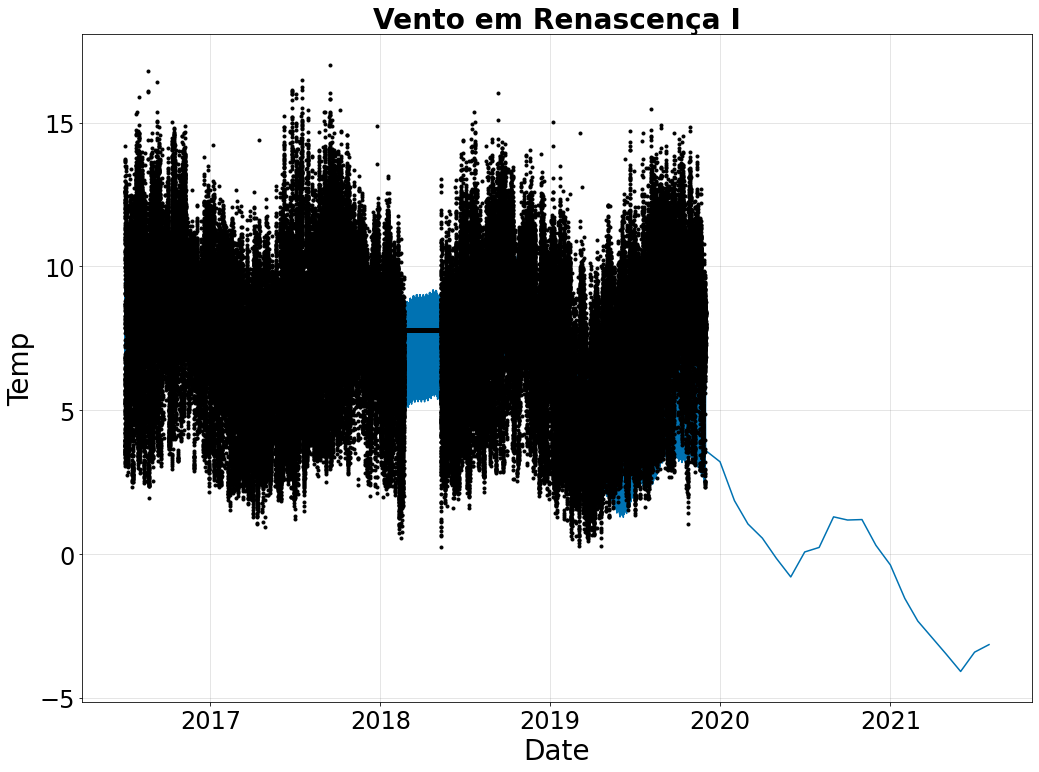

In [97]:
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)

ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("Vento em Renascença I", fontsize=28, fontweight="bold")

fig.savefig("Vento em Renascença I_forecast.png")

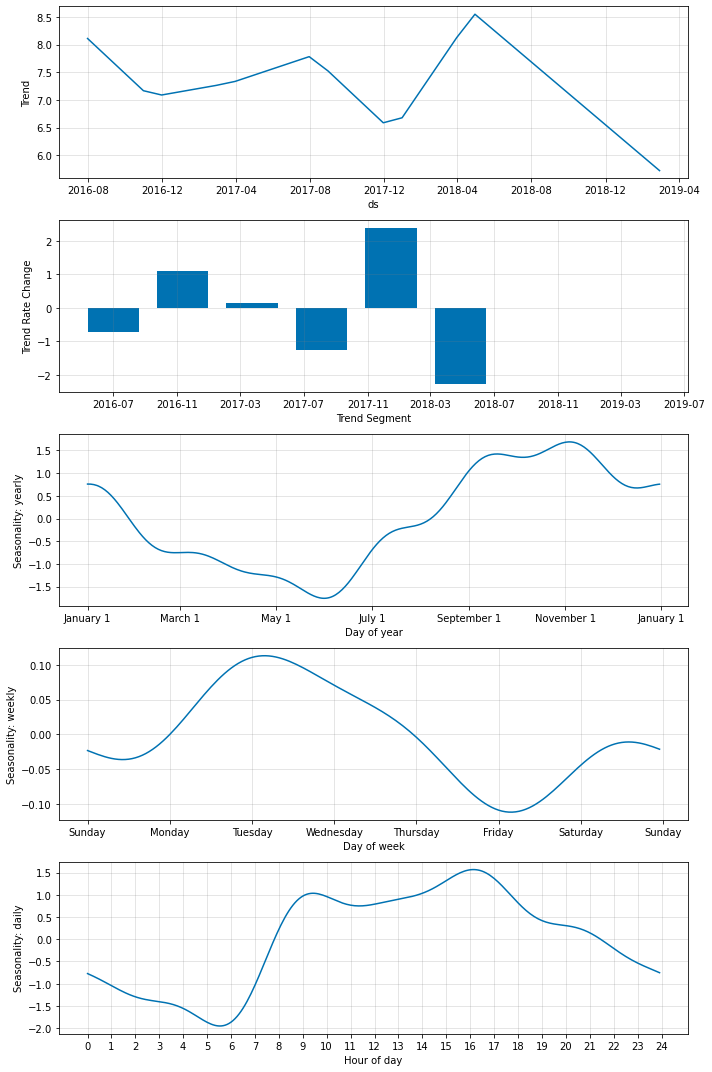

In [98]:
fig_param = model.plot_parameters()
fig_param.savefig("parameters.png")

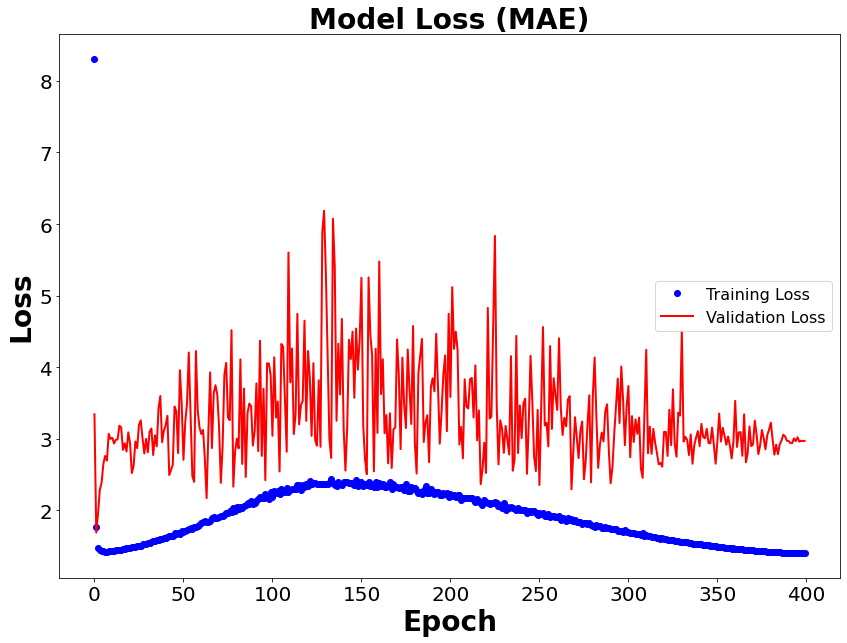

In [99]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")
fig.savefig("model_loss_mae.png")